Make simulate data faster using just a unique estimation for each run, and not estimate each time just a single number.

# Set Up

In [1]:
!git clone https://github.com/nudojacopo/thesis.git

Cloning into 'thesis'...
remote: Enumerating objects: 1000, done.
remote: Counting objects: 100% (249/249), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 1000 (delta 187), reused 70 (delta 48), pack-reused 751
Receiving objects: 100% (1000/1000), 51.19 MiB | 21.59 MiB/s, done.
Resolving deltas: 100% (630/630), done.


In [8]:

root='/kaggle/working/'
import sys
module_path = root+'thesis/src/HWK'
sys.path.append(module_path)
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from scipy import stats
import random
from scipy.stats import chi2
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

In [19]:
from HWK_package.functions import *

## Import Data

In [9]:
!pip install gdown

In [12]:
import gdown

url='https://drive.google.com/uc?id=1fZZefnIvOve2aU9Fg0WGDXncMooQaorA'

output='facebook.csv'/kaggle

gdown.download(url,output,quiet=False)

url='https://drive.google.com/uc?id=1CYe5nbgFLDgRa7ugsZxOOxLjizQbgFii'

output='reddit.csv'

gdown.download(url,output,quiet=False)

url='https://drive.google.com/uc?id=1K6uRHnR9ZT3k18Ip8jYqIRrrccWFxM03'

output='youtube.csv'

gdown.download(url,output,quiet=False)

url='https://drive.google.com/uc?id=1wvPVrEDGvOX6LO-5Of-LuFyGJ8fI9jEN'

output='voat.csv'

gdown.download(url,output,quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1fZZefnIvOve2aU9Fg0WGDXncMooQaorA
From (redirected): https://drive.google.com/uc?id=1fZZefnIvOve2aU9Fg0WGDXncMooQaorA&confirm=t&uuid=abef37d2-2ee3-4044-9dbe-9f4d966233a4
To: /kaggle/working/facebook.csv

  0%|          | 0.00/1.17G [00:00<?, ?B/s]
  0%|          | 4.72M/1.17G [00:00<00:57, 20.2MB/s]
  2%|▏         | 27.8M/1.17G [00:00<00:11, 99.8MB/s]
  5%|▍         | 53.5M/1.17G [00:00<00:07, 154MB/s] 
  7%|▋         | 76.5M/1.17G [00:00<00:06, 179MB/s]
  8%|▊         | 97.5M/1.17G [00:00<00:06, 174MB/s]
 10%|█         | 119M/1.17G [00:00<00:05, 185MB/s] 
 12%|█▏        | 139M/1.17G [00:00<00:05, 187MB/s]
 14%|█▎        | 161M/1.17G [00:00<00:05, 196MB/s]
 16%|█▌        | 184M/1.17G [00:01<00:04, 204MB/s]
 17%|█▋        | 204M/1.17G [00:01<00:05, 178MB/s]
 19%|█▉        | 227M/1.17G [00:01<00:04, 191MB/s]
 21%|██        | 249M/1.17G [00:01<00:04, 198MB/s]
 23%|██▎       | 270M/1.17G [00:01<00:04, 200MB/s]
 25%|██▍       | 

'voat.csv'

# Model simulation

In [13]:
rd=pd.read_csv('/kaggle/working/reddit.csv')
fb=pd.read_csv('/kaggle/working/facebook.csv')
vo=pd.read_csv('/kaggle/working/voat.csv')
yt=pd.read_csv('/kaggle/working/youtube.csv')

In [23]:
fb = fb[fb['temporal_distance_birth_h'] < 100].copy()
fb['temporal_distance_birth_base_100h'] = fb['temporal_distance_birth_h'] / 100

rd = rd[rd['temporal_distance_birth_h'] < 100].copy()
rd['temporal_distance_birth_base_100h'] = rd['temporal_distance_birth_h'] / 100

vo = vo[vo['temporal_distance_birth_h'] < 100].copy()
vo['temporal_distance_birth_base_100h'] = vo['temporal_distance_birth_h'] / 100
vo['post_id'] = vo['root_submission']
vo['user_id']=vo['user']

yt = yt[yt['temporal_distance_birth_h'] < 100].copy()
yt['temporal_distance_birth_base_100h'] = yt['temporal_distance_birth_h'] / 100
yt['user_id']=yt['user']

In [24]:
time_intervals = np.arange(0, 1, 0.01)  # Utilizzo di np.arange per intervalli decimali

fb_ECDF = calculate_ECDF(fb, time_intervals)
fb_ECDF['Platform']='Facebook - News'
rd_ECDF = calculate_ECDF(rd, time_intervals)
rd_ECDF['Platform']='Reddit'

vo_ECDF = calculate_ECDF(vo, time_intervals)
vo_ECDF['Platform']='Voat'

yt_ECDF = calculate_ECDF(yt, time_intervals)
yt_ECDF['Platform']='yt'

combined_results = pd.concat([fb_ECDF, rd_ECDF,vo_ECDF,yt_ECDF], ignore_index=True)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

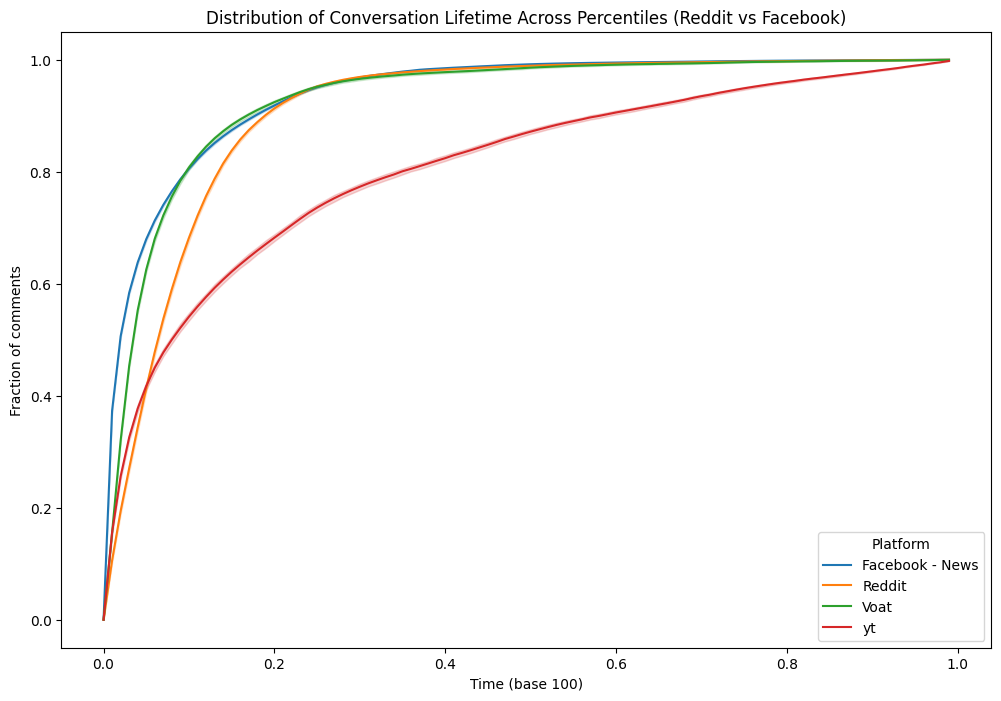

In [25]:
df=combined_results
plot_ECDF(df,level=99)

## Manual simulation

### Parameters FB

In [75]:
# Define the number of threads
n = 10

# Define the parameters dictionary
parameters = {
    "a": 0.3844295492882861,
    "b": 294.47288219865607,
    "loc": 0.0009999999999999998,
    "scale": 33.07578198818712,
    "alpha": 0.1,
    "lambda_": 0.6,
    "c": 0.8569866519794784,
    "d": 12.556141099060724,
    "l": -12.51922356410994,
    "s": 11.830321259706352,
    "cf": 0.6366573262621085,
    "df": 8.374547547078375,
    "lf": -2.5492637062724093,
    "sf": 8.384974991111687
}

# Call the simulate_data function with the unpacked dictionary
simulated, observed = simulate_data(fb, **parameters, num_threads=n)

100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


In [77]:
time_intervals = np.arange(0, 1, 0.01)  # Utilizzo di np.arange per intervalli decimali

simulated_ECDF = calculate_ECDF(simulated, time_intervals)
simulated_ECDF['Platform']='Simulated'
observed_ECDF = calculate_ECDF(observed, time_intervals)
observed_ECDF['Platform']='Observed'

reddit_ECDF = calculate_ECDF(rd[rd['post_id'].isin(rd['post_id'].unique()[0:n])], time_intervals)
reddit_ECDF['Platform']='Reddit'


Processing DataFrame: 100%|██████████| 10/10 [00:00<00:00, 47.82it/s]


In [78]:
combined_results = pd.concat([simulated_ECDF, observed_ECDF], ignore_index=True)
error = calculate_loss(simulated_ECDF, observed_ECDF)
print('The error is equal to: ' + str(round(error, 2)))
print(len(simulated)/len( observed))

The error is equal to: 12.53
0.9537205081669692


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

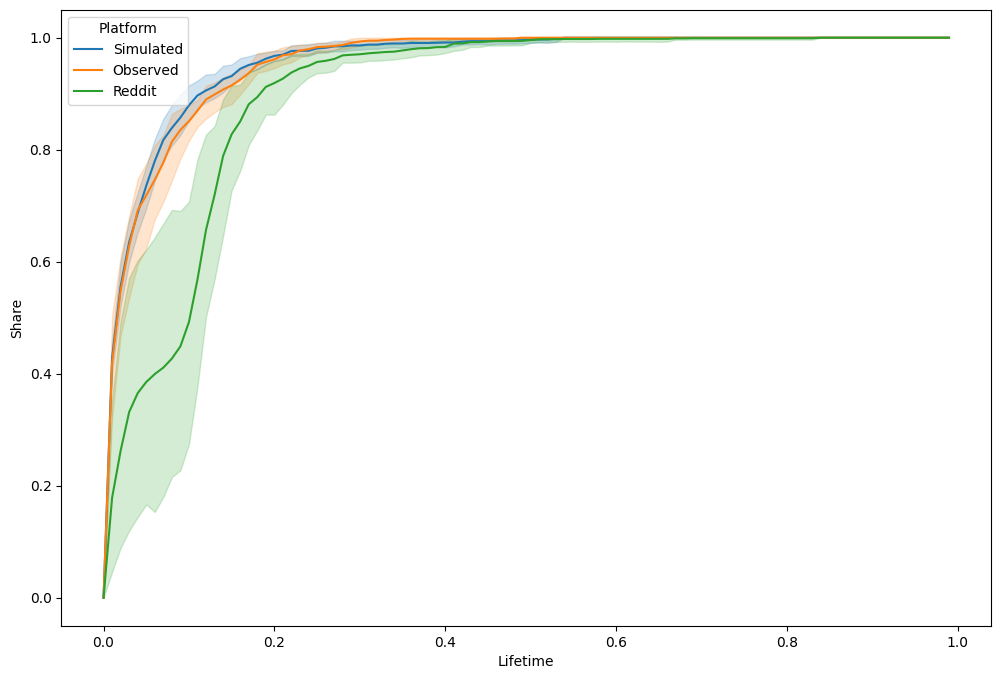

In [80]:
combined_results = pd.concat([simulated_ECDF, observed_ECDF,reddit_ECDF], ignore_index=True)
df=combined_results
# Plotting lineplot for both Reddit and Facebook with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Time Grid Value', y='Share',hue='Platform', errorbar=('ci', 99))
plt.title('')
plt.ylabel('Share')
plt.xlabel('Lifetime')
plt.grid(False)
plt.legend(title='Platform')
plt.show()
# con a,b uguale a 0.8,20

### Parameters YT

In [81]:
# Define the number of threads
n = 10

# Define the parameters dictionary
parameters = {
    "a": 0.5186615140672572,
    "b": 1.7898387515641103,
    "loc": 0.0009999999999999998,
    "scale": 1.110437329330408,
    "alpha": 0.3,
    "lambda_": 0.6,
    "c": 0.5663021409117182,
    "d": 6.55831360057811,
    "l": -1.9310083161118459,
    "s": 8.819660178404714,
    "cf": 0.4727340951603921,
    "df": 36.56890893735914,
    "lf": -2.171689637029706,
    "sf": 0.23303035879717182
}

# Call the simulate_data function with the unpacked dictionary
simulated, observed = simulate_data(yt, **parameters, num_threads=n)


100%|██████████| 10/10 [00:11<00:00,  1.18s/it]


In [44]:
simulated_ECDF = calculate_ECDF(simulated, time_intervals)
simulated_ECDF['Platform']='Simulated'
observed_ECDF = calculate_ECDF(observed, time_intervals)
observed_ECDF['Platform']='YouTube'

reddit_ECDF = calculate_ECDF(fb[fb['post_id'].isin(fb['post_id'].unique()[0:n])], time_intervals)
reddit_ECDF['Platform']='Facebook'

youtube_ECDF = calculate_ECDF(rd[rd['post_id'].isin(rd['post_id'].unique()[0:n])], time_intervals)
youtube_ECDF['Platform']='Reddit'

combined_results = pd.concat([simulated_ECDF, observed_ECDF], ignore_index=True)


Processing DataFrame: 100%|██████████| 100/100 [00:02<00:00, 46.25it/s]


In [45]:
error = calculate_loss(simulated_ECDF, observed_ECDF)
print('The error is equal to: ' + str(round(error, 2)))
print(len(simulated)/len( observed))

The error is equal to: 1159.11
0.7092308399895749


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


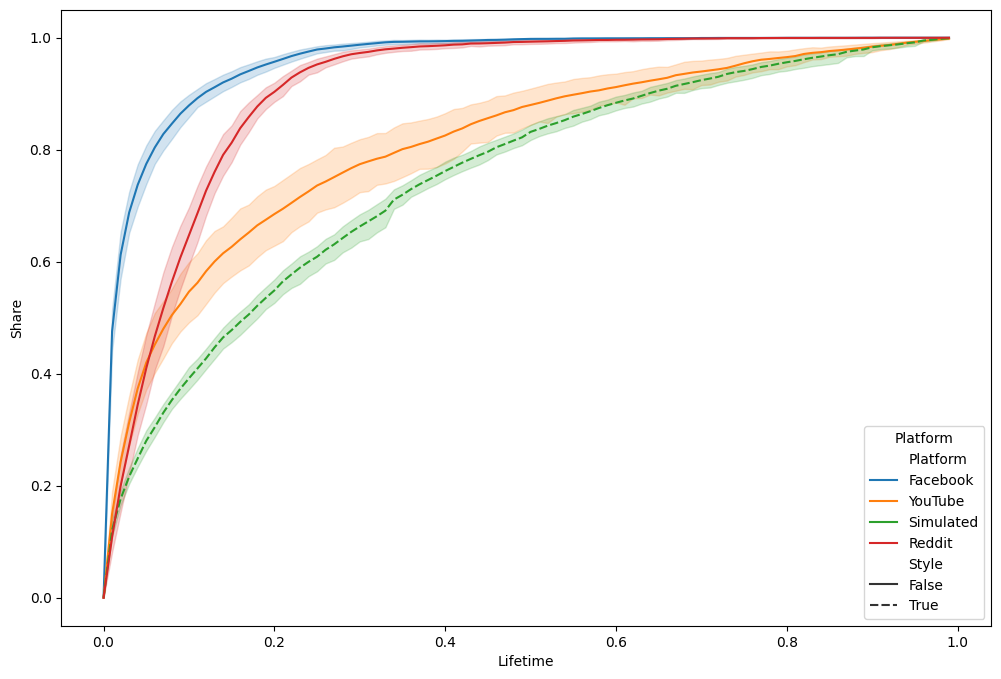

In [46]:

# Concatenate all ECDF data into one DataFrame
combined_results = pd.concat([reddit_ECDF, observed_ECDF, simulated_ECDF, youtube_ECDF], ignore_index=True)
combined_results['Style']=combined_results['Platform']=='Simulated'
# Plotting lineplot for all platforms with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(data=combined_results, x='Time Grid Value', y='Share', hue='Platform',errorbar=('ci', 99), style='Style')
plt.title('')
plt.ylabel('Share')
plt.xlabel('Lifetime')
plt.grid(False)
plt.legend(title='Platform')
plt.show()

### Parameters Vo

In [86]:
# Define the number of threads
n = 100

# Update 'post_id' field in 'vo'
vo['post_id'] = vo['root_submission']

# Define the parameters dictionary
parameters = {
    "a": 0.7683453768943135,
    "b": 181.35859916908146,
    "loc": 0.0009999999999999998,
    "scale": 10.849357267138616,
    "alpha": 0.36,
    "lambda_": 0.14,
    "c": 0.5597232846389999,
    "d": 95.64624655862815,
    "l": -0.21532560420550612,
    "s": 0.14969610190277538,
    "cf": 0.46474050827474,
    "df": 32.24830809233218,
    "lf": -0.07760638016101293,
    "sf": 0.574117870175086
}

# Call the simulate_data function with the unpacked dictionary
simulated, observed = simulate_data(vo, **parameters, num_threads=n)


100%|██████████| 100/100 [00:00<00:00, 346.71it/s]


In [87]:
simulated_ECDF = calculate_ECDF(simulated, time_intervals)
simulated_ECDF['Platform']='Simulated'
observed_ECDF = calculate_ECDF(observed, time_intervals)
observed_ECDF['Platform']='Voat'

reddit_ECDF = calculate_ECDF(fb[fb['post_id'].isin(fb['post_id'].unique()[0:n])], time_intervals)
reddit_ECDF['Platform']='Facebook'

youtube_ECDF = calculate_ECDF(yt[yt['post_id'].isin(yt['post_id'].unique()[0:n])], time_intervals)
youtube_ECDF['Platform']='YouTube'

combined_results = pd.concat([simulated_ECDF, observed_ECDF], ignore_index=True)


Processing DataFrame: 100%|██████████| 100/100 [00:02<00:00, 42.83it/s]


In [89]:
error = calculate_loss(simulated_ECDF, observed_ECDF)
print('The error is equal to: ' + str(round(error, 2)))
print(len(simulated)/len( observed))

The error is equal to: 319.96
0.5387896560917089


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


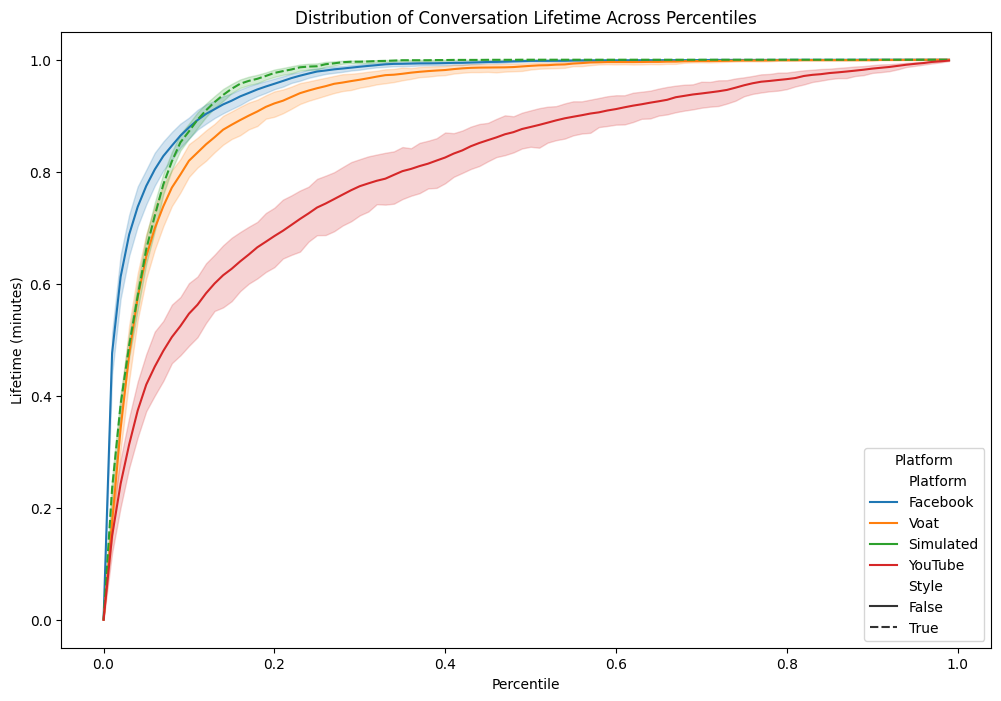

In [90]:

# Concatenate all ECDF data into one DataFrame
combined_results = pd.concat([reddit_ECDF, observed_ECDF, simulated_ECDF, youtube_ECDF], ignore_index=True)
combined_results['Style']=combined_results['Platform']=='Simulated'
# Plotting lineplot for all platforms with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(data=combined_results, x='Time Grid Value', y='Share', hue='Platform',errorbar=('ci', 99), style='Style')
plt.title('Distribution of Conversation Lifetime Across Percentiles')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()

### Parameters RD

In [82]:
# Define the number of threads
n = 10

# Define the parameters dictionary
parameters = {
    "a": 1.3208418726992361,
    "b": 366274394.2558266,
    "loc": 0.00043188573340450587,
    "scale": 21377429.04281839,
    "alpha": 0.6,
    "lambda_": 0.6,
    "c": 0.6069205391107709,
    "d": 14.804821905854089,
    "l": -0.06145338859442588,
    "s": 5.865235905966762,
    "cf": 0.5697079509462244,
    "df": 3.122380555707551,
    "lf": -1.0878713951321233,
    "sf": 223.89075150295344
}

# Call the simulate_data function with the unpacked dictionary
simulated, observed = simulate_data(rd, **parameters, num_threads=n)

100%|██████████| 10/10 [00:02<00:00,  4.03it/s]


In [83]:
simulated_ECDF = calculate_ECDF(simulated, time_intervals)
simulated_ECDF['Platform']='Simulated'
observed_ECDF = calculate_ECDF(observed, time_intervals)
observed_ECDF['Platform']='Reddit'

reddit_ECDF = calculate_ECDF(fb[fb['post_id'].isin(fb['post_id'].unique()[0:n])], time_intervals)
reddit_ECDF['Platform']='Facebook'

youtube_ECDF = calculate_ECDF(yt[yt['post_id'].isin(yt['post_id'].unique()[0:n])], time_intervals)
youtube_ECDF['Platform']='YouTube'

combined_results = pd.concat([simulated_ECDF, observed_ECDF], ignore_index=True)


Processing DataFrame: 100%|██████████| 10/10 [00:00<00:00, 40.37it/s]


In [84]:
error = calculate_loss(simulated_ECDF, observed_ECDF)
print('The error is equal to: ' + str(round(error, 2)))
print(len(simulated)/len( observed))

The error is equal to: 44.24
0.5984072810011376


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

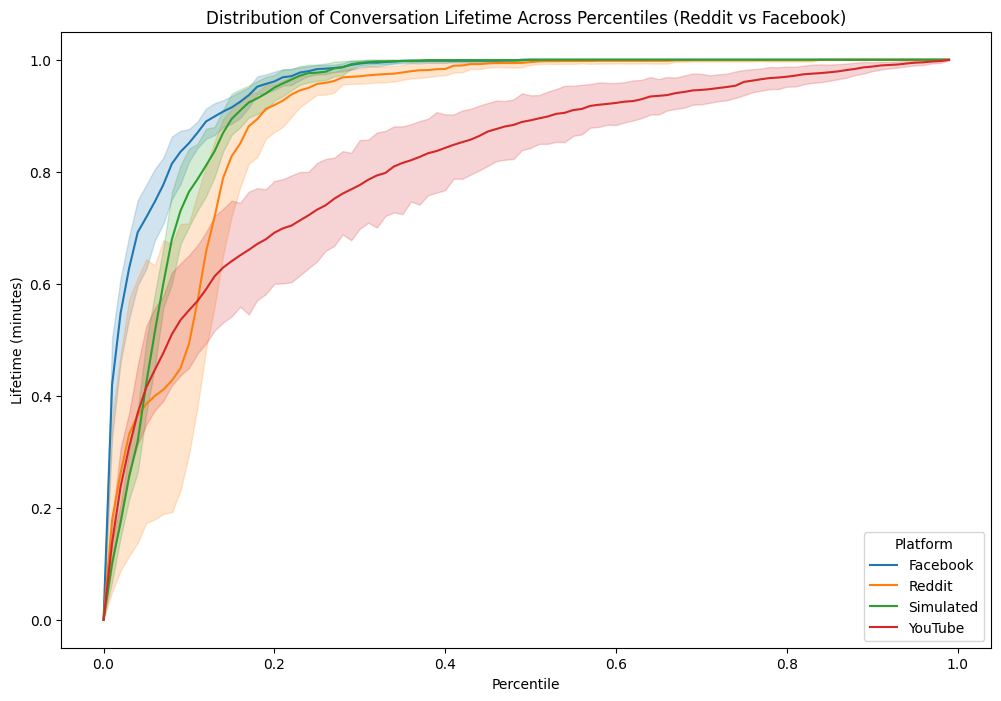

In [85]:
combined_results = pd.concat([reddit_ECDF, observed_ECDF,simulated_ECDF,youtube_ECDF], ignore_index=True)
df=combined_results
# Plotting lineplot for both Reddit and Facebook with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Time Grid Value', y='Share',hue='Platform', errorbar=('ci', 99))
plt.title('Distribution of Conversation Lifetime Across Percentiles (Reddit vs Facebook)')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()


## Grid Search

In [69]:
'''import itertools
import pandas as pd
import numpy as np

# Define the parameters for each platform


a=1.3208418726992361
b=366274394.2558266
loc=0.00043188573340450587
scale=21377429.04281839
alpha=0.6
lambda_=0.6
c=0.6
d=14.804821905854089
l=-0.06145338859442588
s=5.865235905966762

cf=0.5697079509462244
df=3.122380555707551
lf=-1.0878713951321233
sf=223.89075150295344
facebook_params = [1.3208418726992361, 366274394.2558266, 0.00043188573340450587,21377429.04281839,0.6,0.6,0.6,14.804821905854089,-0.06145338859442588,5.865235905966762,0.5697079509462244,3.122380555707551,-1.0878713951321233,223.89075150295344]
reddit_params = [1.3208418726992361, 366274394.2558266, 0.00043188573340450587,21377429.04281839,0.6,0.6,0.6,14.804821905854089,-0.06145338859442588,5.865235905966762,0.5697079509462244,3.122380555707551,-1.0878713951321233,223.89075150295344]

# Combine all parameters
all_params = [facebook_params, reddit_params]

# Initialize an empty list to store results
results = []

# Time intervals (placeholder, to be defined)
time_intervals = np.arange(0, 1, 0.01)  # Using np.arange for decimal intervals

# Loop over each parameter combination
for params in tqdm(all_params):
    # Unpack the parameters
    a, b, alpha, lambda_, loc, scale, c = params[:7]
    d, l, s, cf, df, lf, sf = params[7:] 

    # Simulate synthetic data
    simulated, observed = simulate_data(rd, a, b, loc, scale, alpha, lambda_, c, d, l, s, cf, df, lf, sf, num_threads=1,activate_tqdm=False)

    # Calculate ECDFs
    simulated_ECDF = calculate_ECDF(simulated, time_intervals)
    simulated_ECDF['Platform'] = 'Simulated'
    observed_ECDF = calculate_ECDF(observed, time_intervals)
    observed_ECDF['Platform'] = 'Observed'

    # Calculate error
    error = calculate_loss(simulated_ECDF, observed_ECDF)

    # Append results tuple to list
    results.append((*params, error))

# Convert results list to DataFrame
results_df = pd.DataFrame(results, columns=['a', 'b', 'alpha', 'lambda_', 'loc', 'scale', 'c', 'd', 'l', 's', 'cf', 'df', 'lf', 'sf', 'Error'])

print(results_df)
'''

Processing DataFrame: 100%|██████████| 1/1 [00:00<00:00, 40.87it/s]

Processing DataFrame: 100%|██████████| 1/1 [00:00<00:00, 44.72it/s]

100%|██████████| 2/2 [09:20<00:00, 280.18s/it]

          a             b     alpha       lambda_  loc  scale    c          d  \
0  1.320842  3.662744e+08  0.000432  2.137743e+07  0.6    0.6  0.6  14.804822   
1  1.320842  3.662744e+08  0.000432  2.137743e+07  0.6    0.6  0.6  14.804822   

          l         s        cf        df        lf          sf      Error  
0 -0.061453  5.865236  0.569708  3.122381 -1.087871  223.890752  53.525424  
1 -0.061453  5.865236  0.569708  3.122381 -1.087871  223.890752  53.525424  
